In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path("../..").resolve()))

from src.data_ingestion import *
from src.data_preprocessing import *


from pyspark.sql import DataFrame
from pyspark.sql.functions import col
from pyspark.sql.types import NumericType, StringType
from pyspark.sql import functions as F

import seaborn as sns

import numpy as np

from itertools import combinations

from scipy import stats

import matplotlib.pyplot as plt

import pandas as pd
from pyspark.sql.window import Window




In [2]:
spark = init_spark()
df = load_data(spark, "../../data/US_Accidents_March23.csv")

In [3]:
# df = preprocess_data(df)

### Location Analysis

C:\Users\Ahmed Osama\AppData\Local\Temp\ipykernel_27512\1639314190.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_severity_states, x="State", y="Avg_Severity", palette="Reds_d")


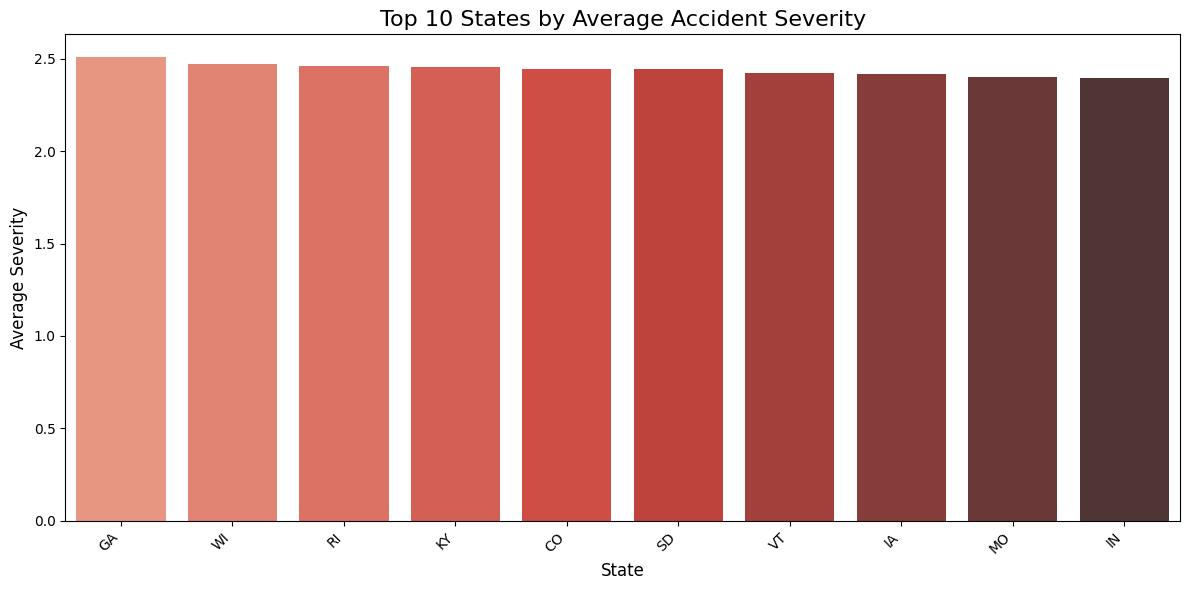

In [4]:
avg_severity_states = df.groupBy("State").agg(F.avg("Severity").alias("Avg_Severity")) \
                        .orderBy(F.col("Avg_Severity").desc()) \
                        .limit(10).toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_severity_states, x="State", y="Avg_Severity", palette="Reds_d")

plt.title("Top 10 States by Average Accident Severity", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Average Severity", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


C:\Users\Ahmed Osama\AppData\Local\Temp\ipykernel_32380\3736368677.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x="City", y="Accident_Count", palette="Blues_d")


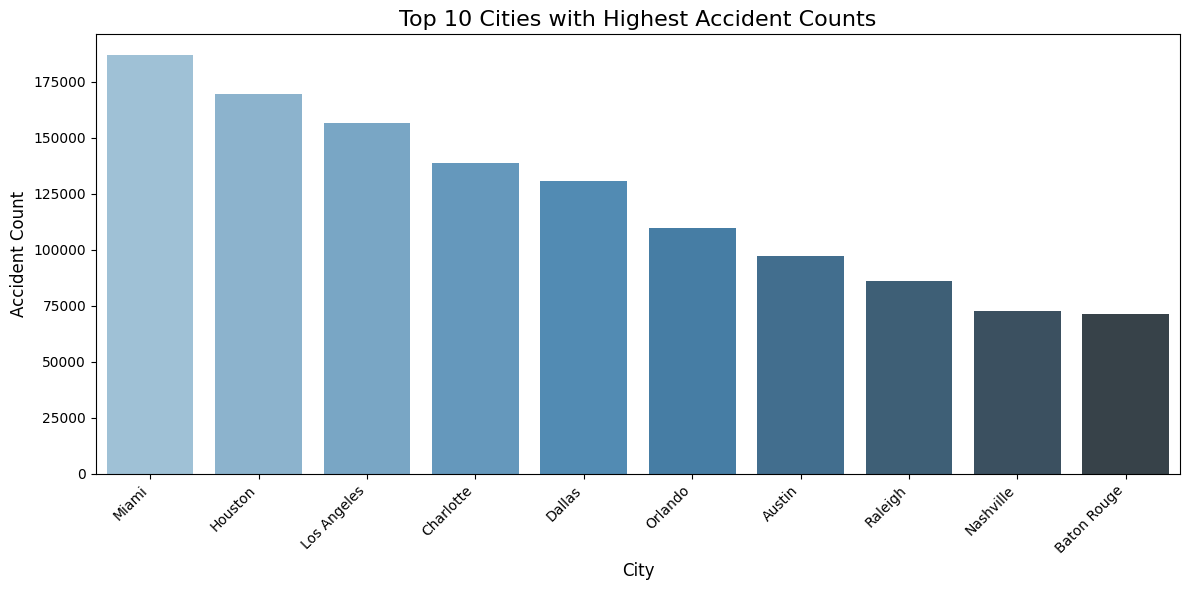

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_cities = df.groupBy("City").agg(F.count("*").alias("Accident_Count")) \
               .orderBy(F.col("Accident_Count").desc()) \
               .limit(10).toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x="City", y="Accident_Count", palette="Blues_d")

plt.title("Top 10 Cities with Highest Accident Counts", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Accident Count", fontsize=12)
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()

plt.show()

C:\Users\Ahmed Osama\AppData\Local\Temp\ipykernel_32380\1704503168.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_counties, x="County", y="Accident_Count", palette="Greens_d")


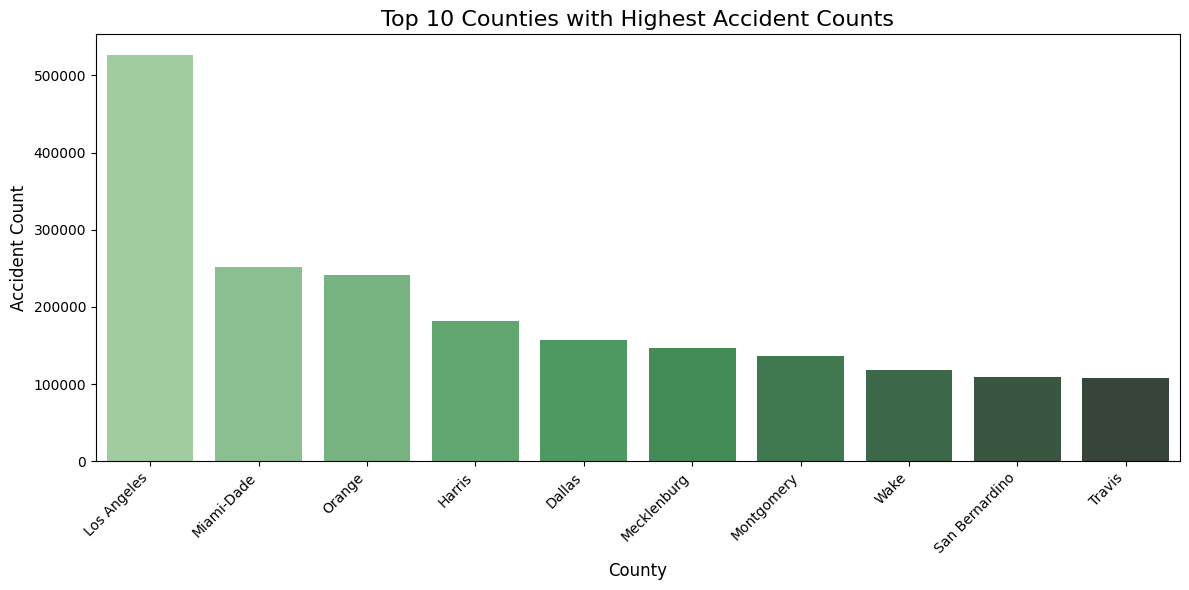

In [ ]:
top_counties = df.groupBy("County").agg(F.count("*").alias("Accident_Count")) \
                 .orderBy(F.col("Accident_Count").desc()) \
                 .limit(10).toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_counties, x="County", y="Accident_Count", palette="Greens_d")

plt.title("Top 10 Counties with Highest Accident Counts", fontsize=16)
plt.xlabel("County", fontsize=12)
plt.ylabel("Accident Count", fontsize=12)
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()
plt.show()

C:\Users\Ahmed Osama\AppData\Local\Temp\ipykernel_32380\3753974140.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x="State", y="Accident_Count", palette="Oranges_d")


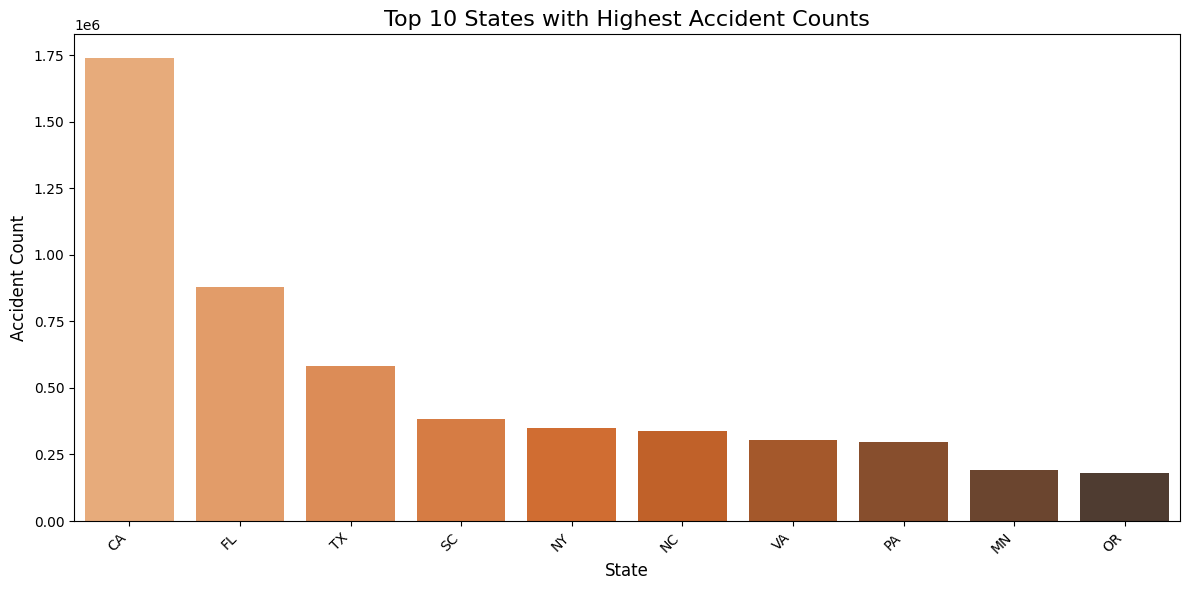

In [ ]:
# Aggregate accident counts by state
top_states = df.groupBy("State").agg(F.count("*").alias("Accident_Count")) \
               .orderBy(F.col("Accident_Count").desc()) \
               .limit(10).toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x="State", y="Accident_Count", palette="Oranges_d")

plt.title("Top 10 States with Highest Accident Counts", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Accident Count", fontsize=12)
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()


plt.show()